In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import boxcox
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Output/NEES_summary_with_heliquest.csv')

In [3]:
# Cut out the rows with no data in "Median"
df_with_NEES = df[df['Median'].notna()]
# Leave the rows with no data in "Median"
df_without_NEES = df[df['Median'].isna()]

In [4]:
# A bespoke funtion for plotting
def myplot(df, y):
    plt.figure(figsize=(2, 3))
    sns.boxplot(y=y, data=df, palette="Blues")
    # Add scatter points jittered for better visualization
    sns.stripplot(y=y, data=df, color="black", jitter=True, alpha=0.5)
    # sns.stripplot(x=x, y=y, data=df, order=order, color='black', jitter=True, alpha=0.5)

    plt.tight_layout()
    plt.show()

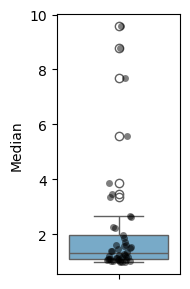

In [5]:
# Original median values
myplot(df=df_with_NEES, y='Median')

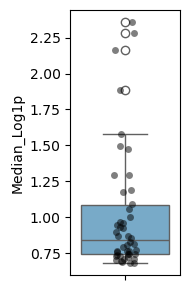

In [6]:
# Log transformation
df_with_NEES["Median_Log1p"] = np.log1p(df_with_NEES['Median'])
myplot(df=df_with_NEES, y='Median_Log1p')

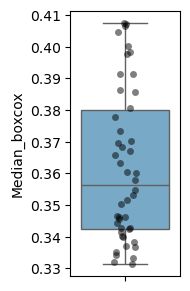

Box-Cox transformation lambda: -2.446267291992881


In [7]:
# Box-Cox transformation
shifted_median = df_with_NEES['Median'] + 1  # shift by +1 to ensure all values are positive
boxcox_transformed, _ = boxcox(shifted_median)
df_with_NEES['Median_boxcox'] = boxcox_transformed
myplot(df_with_NEES, y='Median_boxcox')
print("Box-Cox transformation lambda:", _)

In [8]:
# Concatanate the two dataframes
df_combined = pd.concat([df_with_NEES, df_without_NEES], ignore_index=True)

In [9]:
df_combined.to_csv('./Output/NEES_summary_with_heliquest_Median_Transformed.csv', index=False)